# **Traffic Signs Classification**
The purpose of this notebook is to classify traffic signs of 10 classes using computer vission/ML algorithms.
We will be using HOG for feature extraction and SVM for classification.

## **Importing Libraries**

In [364]:
import numpy as np
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from subprocess import check_output
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

## **Mounting drive to read data**
We will be reading data using google drive.

In [1]:

drive.mount('/content/drive')

Mounted at /content/drive


## **Read File Paths**
There are 10 classes and each class has two text files containing training and test images list. We need to read all the training and test images paths for each class seperately and then combine using a dataframe.
The function defined below as **read_data()** takes two arguements class-name and text filename(train.txt or test.txt). It creates a dataframe for all the image paths and return that dataframe. The dataframe is then concatenated by original dataframes of test train.We also shffle both data frames before reading images for better experience.

In [339]:
def read_data(c, t):
  # read Train.csv file which contains image names and labels and preprocess them
  if c=="10":
    compi_root_path= "/content/drive/MyDrive/Sign_Dataset/000"+c+"/"
  else:
    compi_root_path= "/content/drive/MyDrive/Sign_Dataset/0000"+c+"/"
  df_val_compi = pd.read_csv(compi_root_path + t+".txt", header=None)

# add absolute path to the image names
  df_val_compi["filename"] = df_val_compi.apply(lambda x: compi_root_path + x)
  df_val_compi = df_val_compi.rename(columns={df_val_compi.keys()[0]: 'labels'})
  df_val_compi = df_val_compi.rename(columns={df_val_compi.keys()[1]: 'filename'})
  df_val_compi=df_val_compi.assign(labels=c)
  return df_val_compi

Creating dataframes for test and train

In [340]:
t1="train"
t2="test"
test=read_data("1",t2)
train=read_data("1",t1)
classes=9
for i in range(classes):
  train=train.append(read_data(str(i+2),t1))
  test=test.append(read_data(str(i+2),t2))

print("len(train)=",len(train))
print("len(test)=",len(test))

len(train)= 800
len(test)= 200


train and test dataframes head before shuffeling. We can only see images from class 1 as they are not shuffles.

In [341]:
train.head()

,labels,filename
0,1,/content/drive/MyDrive/Sign_Dataset/00001/0046...
1,1,/content/drive/MyDrive/Sign_Dataset/00001/0047...
2,1,/content/drive/MyDrive/Sign_Dataset/00001/0047...
3,1,/content/drive/MyDrive/Sign_Dataset/00001/0047...
4,1,/content/drive/MyDrive/Sign_Dataset/00001/0080...


In [342]:
test.head()

,labels,filename
0,1,/content/drive/MyDrive/Sign_Dataset/00001/0002...
1,1,/content/drive/MyDrive/Sign_Dataset/00001/0002...
2,1,/content/drive/MyDrive/Sign_Dataset/00001/0002...
3,1,/content/drive/MyDrive/Sign_Dataset/00001/0002...
4,1,/content/drive/MyDrive/Sign_Dataset/00001/0002...


Shuffeling both train and test dataframes for better experience

In [343]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

train and test dataframes head after shuffle. We can see different classes as we have performed shuffeling

In [344]:
train.head()

,labels,filename
0,6,/content/drive/MyDrive/Sign_Dataset/00006/0120...
1,7,/content/drive/MyDrive/Sign_Dataset/00007/0130...
2,7,/content/drive/MyDrive/Sign_Dataset/00007/0167...
3,4,/content/drive/MyDrive/Sign_Dataset/00004/0098...
4,1,/content/drive/MyDrive/Sign_Dataset/00001/0080...


In [345]:
test.head()

,labels,filename
0,5,/content/drive/MyDrive/Sign_Dataset/00005/0002...
1,1,/content/drive/MyDrive/Sign_Dataset/00001/0007...
2,1,/content/drive/MyDrive/Sign_Dataset/00001/0045...
3,2,/content/drive/MyDrive/Sign_Dataset/00002/0002...
4,3,/content/drive/MyDrive/Sign_Dataset/00003/0037...


## **Read Data**
We will use the above dataframes of test and train to load image dataset using **skimage.io.imread()**

In [346]:
import skimage.io
from skimage import data, io, filters
def load_data(t):
    images = []
    for d in t.get("filename"):
        images.append(skimage.io.imread(d))
    return images, t.get("labels")

Reading training images

In [347]:
train_imgs, train_lbls=load_data(train)

Sample of training images. Different classes are visible evn though we are just displaying images in a row. It is because we shuffled our dataframe so images are also shuffles as these are being loaded from datafram of paths.

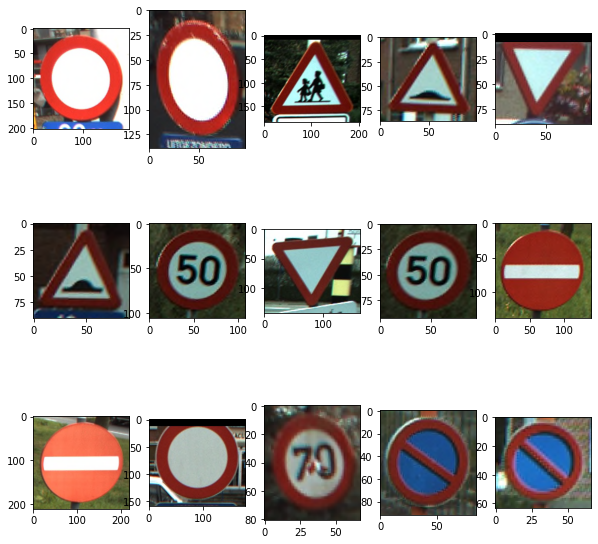

In [348]:
fig , axs = plt.subplots(3,5 ,figsize = (10,10))

axs[0][0].imshow(train_imgs[1])
axs[0][1].imshow(train_imgs[2])
axs[0][2].imshow(train_imgs[3])
axs[0][3].imshow(train_imgs[4])
axs[0][4].imshow(train_imgs[5])
axs[1][0].imshow(train_imgs[6])
axs[1][1].imshow(train_imgs[7])
axs[1][2].imshow(train_imgs[8])
axs[1][3].imshow(train_imgs[9])
axs[1][4].imshow(train_imgs[10])
axs[2][0].imshow(train_imgs[11])
axs[2][1].imshow(train_imgs[12])
axs[2][2].imshow(train_imgs[13])
axs[2][3].imshow(train_imgs[14])
axs[2][4].imshow(train_imgs[15])


plt.show()

Reading test images

In [349]:
test_imgs, test_lbls=load_data(test)

Sample of test images

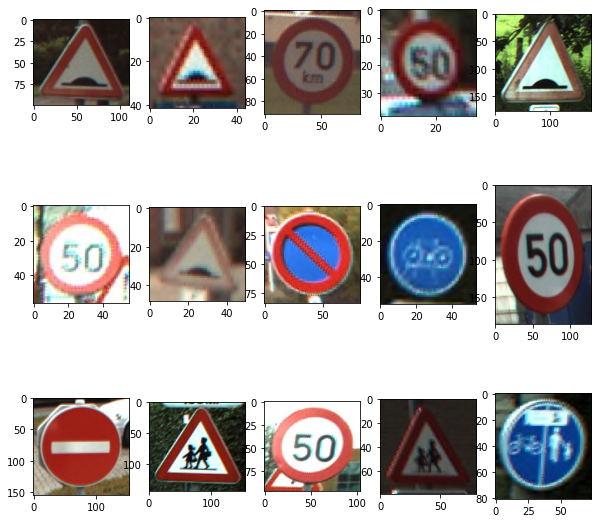

In [350]:
fig , axs = plt.subplots(3,5 ,figsize = (10,10))

axs[0][0].imshow(test_imgs[1])
axs[0][1].imshow(test_imgs[2])
axs[0][2].imshow(test_imgs[3])
axs[0][3].imshow(test_imgs[4])
axs[0][4].imshow(test_imgs[5])
axs[1][0].imshow(test_imgs[6])
axs[1][1].imshow(test_imgs[7])
axs[1][2].imshow(test_imgs[8])
axs[1][3].imshow(test_imgs[9])
axs[1][4].imshow(test_imgs[10])
axs[2][0].imshow(test_imgs[11])
axs[2][1].imshow(test_imgs[12])
axs[2][2].imshow(test_imgs[13])
axs[2][3].imshow(test_imgs[14])
axs[2][4].imshow(test_imgs[15])


plt.show()

## **HOG Feature Extraction**
We are using hog for feature extraction. We will pass images that will be converted to **gray-scale** and will be resized in **(64, 64)**  as preprocessing. We are using total of 9 bins in our case. We will be using **L2 Norm**. We will extract feature from all images one-by-one.

In [351]:
import cv2
from skimage import feature as ft 
def hog_feature(img_array, resize=(64,64)):

    img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, resize)
    bins = 9
    cell_size = (8, 8)
    cpb = (2, 2)
    norm = "L2"
    features = ft.hog(img, orientations=bins, pixels_per_cell=cell_size, 
                        cells_per_block=cpb, block_norm=norm, transform_sqrt=True)
    return features

Extracting features from train images

In [352]:
train_features=[]
for im in train_imgs:
  train_features.append(hog_feature(im))

## **Applying Classifier And Training**
We will be using SVM as our classifier with a linear kernel and traing our model.

In [353]:
clf = SVC(kernel="linear", C=10, tol=1e-3, probability=True)
clf.fit(train_features, train_lbls)

SVC(C=10, kernel='linear', probability=True)

## **Results**
We will be measuring results in terms of Accuracy, F1 Score, Precision, Recall and confission matrix for Quantitaive measures and for qualitative measures we will do prediction on few images to check correctly and incorrectly classified images. There are total of 20 images for test in each class.

We need to extract features for test images as well because we cannot use images directly for predicions

In [354]:
test_features=[]
for im in test_imgs:
  test_features.append(hog_feature(im))

### **Test Accuracy**
Checking accuracy of our model with test images features and test lables

In [363]:
accuracy = clf.score(test_features, test_lbls)
print("Accuracy=",(accuracy*100))

Accuracy= 100.0


### **Predicting Classes for Precision, Recall and F1-Score**
We will use Precision, Recall and F1-Score here

In [290]:
predictions = clf.predict(test_features)
# Get most likely class
true_classes = np.array(test_lbls)

In [293]:
report = metrics.classification_report(true_classes, predictions)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### **Confission Matrix**
We have used names for each class in confission matrix.

In [294]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predictions)

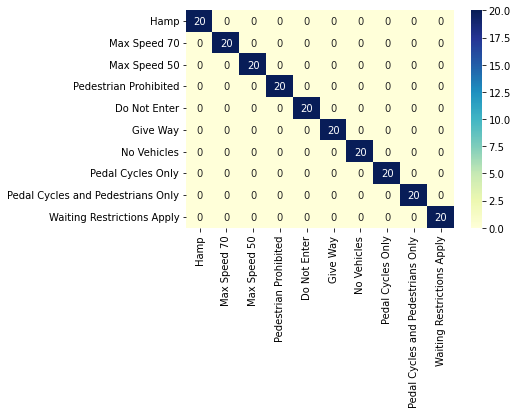

In [295]:
import seaborn as sns
class_names=["Hamp","Max Speed 70","Max Speed 50","Pedestrian Prohibited","Do Not Enter","Give Way","No Vehicles","Pedal Cycles Only","Pedal Cycles and Pedestrians Only","Waiting Restrictions Apply"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

### **Qualitativ Results Measures**
We are showing few images randomly chosen to be classified to see correctly and incorrectly classified images. Labels are shown above each image as predicted

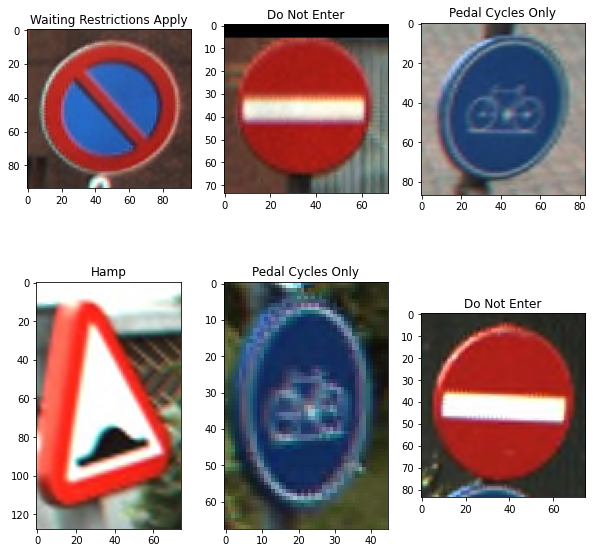

In [296]:
import matplotlib.pyplot as plt

fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(test_imgs[1])
axs[0][0].set_title(class_names[int(predictions[1])-1])
axs[0][1].imshow(test_imgs[2])
axs[0][1].set_title(class_names[int(predictions[2])-1])
axs[0][2].imshow(test_imgs[3])
axs[0][2].set_title(class_names[int(predictions[3])-1])
axs[1][0].imshow(test_imgs[4])
axs[1][0].set_title(class_names[int(predictions[4])-1])
axs[1][1].imshow(test_imgs[5])
axs[1][1].set_title(class_names[int(predictions[5])-1])
axs[1][2].imshow(test_imgs[6])
axs[1][2].set_title(class_names[int(predictions[6])-1])

plt.show()